In [1]:
'''
Предметная область:
Гибель Титаника – одно из самых печально известных кораблекрушений в истории.

15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул
после столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, 
в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.

Хотя в выживании присутствовал некоторый элемент удачи, похоже, 
что у некоторых групп людей было больше шансов выжить, чем у других.

Источник данных:
https://github.com/awesomedata/awesome-public-datasets

Краткое описание датасета:
Survived - тип данных: числовой - выжившие (0 - не выжил, 1 - выжил) 
Pclass - тип данных: числовой - класс билета (1 - первый, 2 - второй, 3 - третий)
Sex - тип данных: строковый - пол
Age - тип данных: числовой - возраст
SibSp - тип данных: числовой - количество братьев/сестер/супругов на борту Титаника
Parch - тип данных: числовой - количество родителей/детей на борту Титаника
Ticket - тип данных: строковый - номер билета
Fare - тип данных: числовой - пассажирский тариф
Cabin - тип данных: строковый - номер каюты
Embarked - порт погрузки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

pclass : показатель социально-экономического статуса (SES).
1-й = верхний
2-й = средний
3-й = нижний
возраст : возраст является дробным, если меньше 1. Если возраст оценивается, он имеет форму xx.5
sibsp : набор данных определяет семейные отношения таким образом:
Брат, сестра, сводный брат, сводная сестра
Супруг = муж, жена (любовницы и невесты не учитывались)
parch : Набор данных определяет семейные отношения таким образом:
Родитель = мать, отец
Ребенок = дочь, сын, падчерица, пасынок
Некоторые дети путешествовали только с няней, поэтому для них parch=0.

Задачи:
Для каждого атрибута определить:
1) Среднее значение, СКО.
2) Построить гистограмму распределения значений. Определить, есть ли выбросы.
3) Определить, есть ли пропущенные значения и сколько их
4) Предложить вариант обработки пропущенных значений

Определить корреляцию между параметрами:
5) Какие атрибуты высококоррелированы? Определить характер корреляции.
6) Какие атрибуты не имеют корреляцию?
7) Построить графики рассеивания (или матрицу графиков рассеивания)
8) Проанализировать полученные результаты
'''

'\nПредметная область:\nГибель Титаника – одно из самых печально известных кораблекрушений в истории.\n\n15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул\nпосле столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, \nв результате чего погибли 1502 из 2224 пассажиров и членов экипажа.\n\nХотя в выживании присутствовал некоторый элемент удачи, похоже, \nчто у некоторых групп людей было больше шансов выжить, чем у других.\n\nИсточник данных:\nhttps://github.com/awesomedata/awesome-public-datasets\n\nКраткое описание датасета:\nSurvived - тип данных: числовой - выжившие (0 - не выжил, 1 - выжил) \nPclass - тип данных: числовой - класс билета (1 - первый, 2 - второй, 3 - третий)\nSex - тип данных: строковый - пол\nAge - тип данных: числовой - возраст\nSibSp - тип данных: числовой - количество братьев/сестер/супругов на борту Титаника\nParch - тип данных: числовой - количество родителей/детей на

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
_data = pd.read_csv('titanic.csv')
_data.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S  
15      0            248706  16.0000   NaN        S  
16      1            382652  29.1250   NaN        Q  
17      0            244373  13.0000   NaN        S  
18      0            345763  18.0000   NaN        S  
19      0              2649   7.2250   NaN        C

In [56]:
#1.1 Средние значение атрибутов:

#Survived
res = _data['Survived'].mean()
print('Выжило в среднем:' + str(round(res,3) * 100) + '%')
#Pclass
res = int(_data['Pclass'].mean())
print('Класс билета пассажиров на борту в среднем:' + str(res))
#Sex
men_count = len(_data[(_data['Sex'] == 'male')])
women_count = len(_data[(_data['Sex'] == 'female')])
if men_count>women_count:
    print('В среднем на борту было больше людей мужского пола')
elif men_count<women_count:
    print('В среднем на борту было больше людей женского пола')
else:
    print('На борту было одинаковое количество людей мужского и женского полов')
#Age
res = round(_data['Age'].mean(), 1)
print('Средний возраст пассижиров/персонала: ' + str(res))
#SibSp
res = round(_data['SibSp'].mean(), 0)
print('Среднее количество братьев/сестер/супругов на борту у одного человека: ' + str(res))
#Parch
res = round(_data['Parch'].mean(), 0)
print('Среднее количество родителей/детей на борту у одного человека: ' + str(res))

#Fare
res = round(_data['Fare'].mean(), 4)
print('Средняя стоимость тарифа: '+ str(res))

#Embarked
C_count = len(_data[(_data['Embarked'] == 'C')])
Q_count = len(_data[(_data['Embarked'] == 'Q')])*2
S_count = len(_data[(_data['Embarked'] == 'S')])*3
res = round((C_count + Q_count + S_count) / len(_data['Embarked']), 0)
if res == 1:
    print("В погрузка пассажиров осуществлялась в Шебурге")
elif res == 2:
    print("В погрузка пассажиров осуществлялась в Квинстауне")
elif res == 3:
    print("В погрузка пассажиров осуществлялась в Саутгемптоне")

    

Выжило в среднем:38.4%
Класс билета пассажиров на борту в среднем:2
В среднем на борту было больше людей мужского пола
Средний возраст пассижиров/персонала: 29.7
Среднее количество братьев/сестер/супругов на борту у одного человека: 1.0
Среднее количество родителей/детей на борту у одного человека: 0.0
Средняя стоимость тарифа: 32.2042
В погрузка пассажиров осуществлялась в Саутгемптоне


In [51]:
#СКО

#Survived
res = round(_data['Survived'].std(),5)
print('СКО выживших:' + str(res))
#Pclass
res = round(_data['Pclass'].std(),0)
print('СКО класса:' + str(res))
    
#Age
res = round(_data['Age'].std(),1)
print('СКО возраста:' + str(res))
#SibSp
res = round(_data['SibSp'].std(),1)
print('СКО количества братьев/сестер/супругов на борту у одного человека: ' + str(res))
#Parch
res = round(_data['Parch'].std(),1)
print('СКО количества родителей/детей на борту у одного человека: ' + str(res))

#Fare
res = round(_data['Fare'].std(),5)
print("СКО стоимости тарифа: "+ str(res))


СКО выживших:0.48659
СКО класса:1.0
СКО возраста:14.5
СКО количества братьев/сестер/супругов на борту у одного человека: 1.1
СКО количества родителей/детей на борту у одного человека: 0.8
СКО стоимости тарифа: 49.69343


In [55]:
#Пропущенные значения

print('Количество пропущенных значений:')
print(_data.isnull().sum())

"""Можно заметить, что пропущенные значения имеют три столбца: Age, Cabin и Embraked.
Рассмотрим столбец Age:
В этом столбце записан возраст пассажиров/персонала, находившихся на борту. 
Можно разделить их на две группы: выжил и не выжил. А также каждую из них разделить на подгруппы по полу.
Предлагается в каждой подшруппе посчитать среднее значение и заполнить недостающие данные ими.

Рассмотрим столбец Embraked:
В этом столбце записан порт погрузки пассажира и пропущено всего два значения.
Предлагается вписать вместо недостающих значений название порта, в котором
чаще всего осуществлялась погрузка

Рассмотрим столбец Cabin:
В этом столбце записан номер каюты пассажира/члена экипажа.
Можно заметить, что пропущено очень много значений. В данном случае 
предлагается либо удалить столбец, либо оставить отсутствующие значения как отсутствующие значения.
Однако, если удалять столбец, 
то следует выяснить взяимосвязь между выживанием и отсутствием значения в колонке.
"""

Количество пропущенных значений:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


'Можно заметить, что пропущенные значения имеют три столбца: Age, Cabin и Embraked.\nРассмотрим столбец Age:\nВ этом столбце записан возраст пассажиров/персонала, находившихся на борту. \nМожно разделить их на две группы: выжил и не выжил. А также каждую из них разделить на подгруппы по полу.\nПредлагается в каждой подшруппе посчитать среднее значение и заполнить недостающие данные ими.\n\nРассмотрим столбец Embraked:\nВ этом столбце записан порт погрузки пассажира и пропущено всего два значения.\nПредлагается вписать вместо недостающих значений название порта, в котором\nчаще всего осуществлялась погрузка\n\nРассмотрим столбец Cabin:\nВ этом столбце записан номер каюты пассажира/члена экипажа.\nМожно заметить, что пропущено очень много значений. В данном случае \nпредлагается либо удалить столбец, либо оставить отсутствующие значения как отсутствующие значения.\nОднако, если удалять столбец, \nто следует выяснить взяимосвязь между выживанием и отсутствием значения в колонке.\n'

''

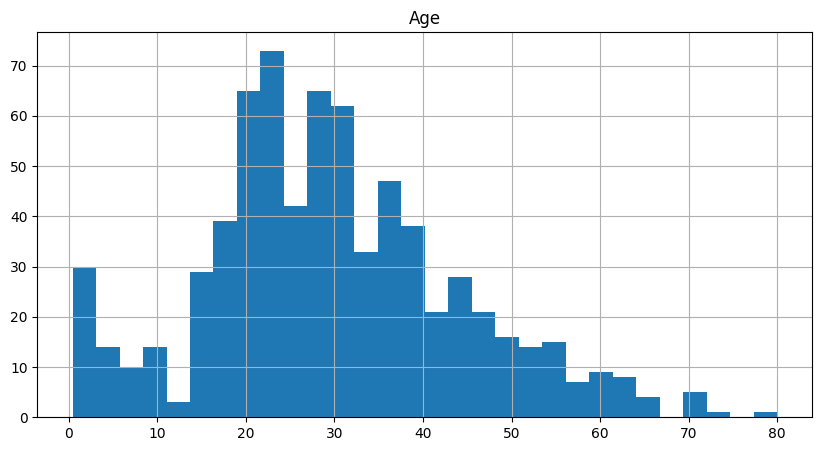

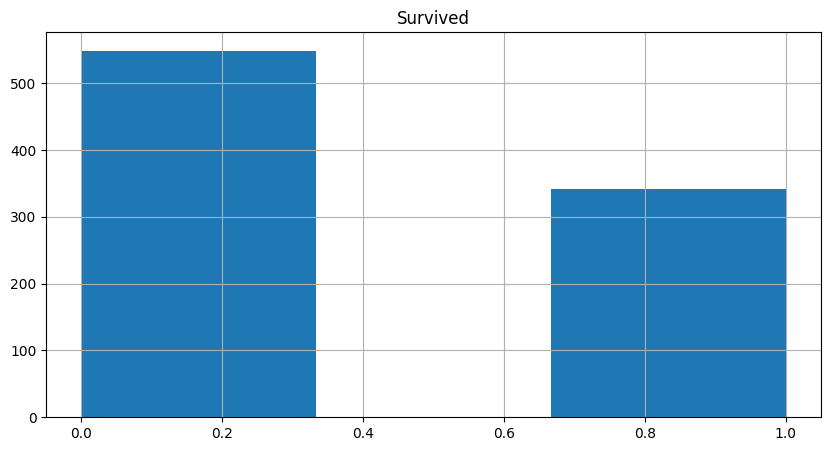

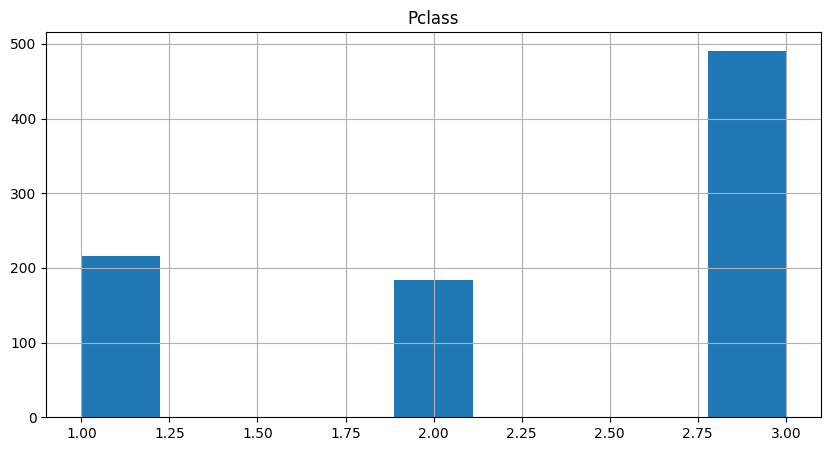

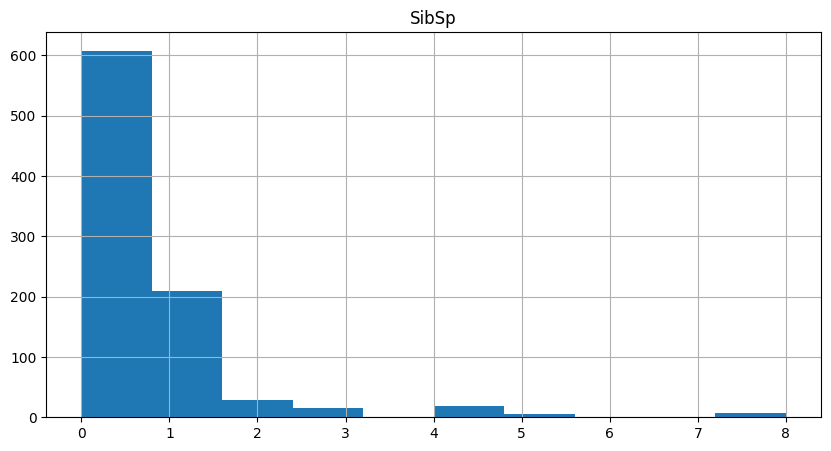

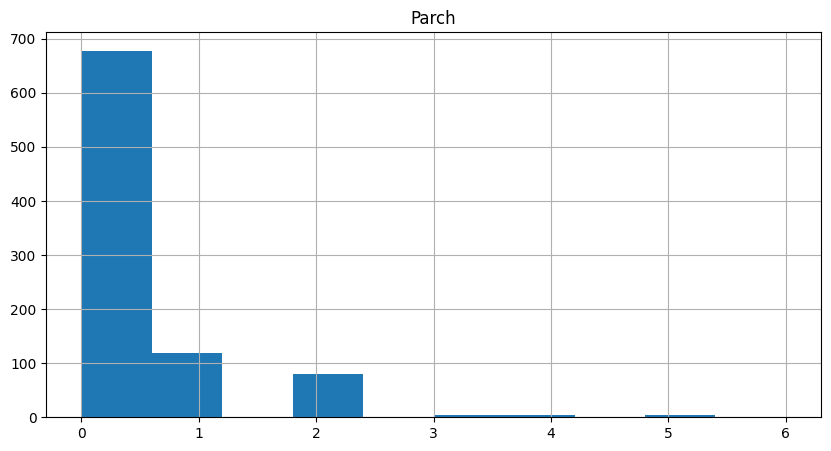

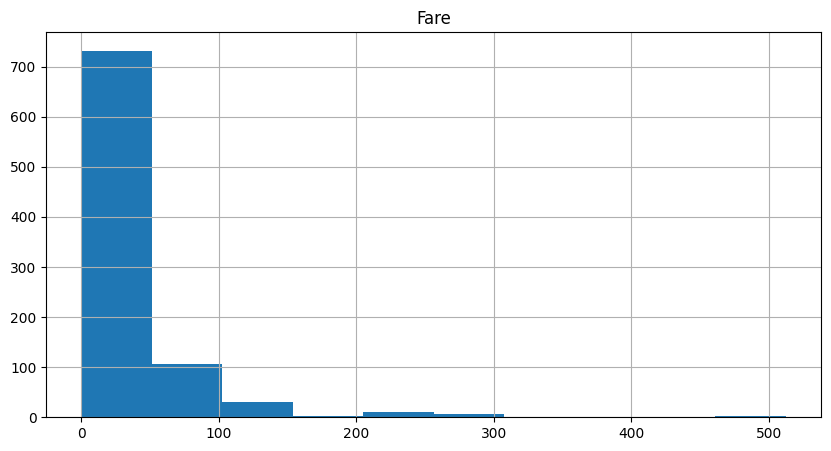

In [8]:
#Гистограммы
plt.figure(figsize=(10,5))
plt.hist(_data['Age'], bins = 30)
plt.grid(True)
plt.title('Age')

plt.figure(figsize=(10,5))
plt.hist(_data['Survived'], bins = 3)
plt.grid(True)
plt.title('Survived')

plt.figure(figsize=(10,5))
plt.hist(_data['Pclass'], bins = 9)
plt.grid(True)
plt.title('Pclass')

plt.figure(figsize=(10,5))
plt.hist(_data['SibSp'], bins = 10)
plt.grid(True)
plt.title('SibSp')

plt.figure(figsize=(10,5))
plt.hist(_data['Parch'], bins = 10)
plt.grid(True)
plt.title('Parch')

plt.figure(figsize=(10,5))
plt.hist(_data['Fare'], bins = 10)
plt.grid(True)
plt.title('Fare')

"""
Возможен выброс в атрибуте "Fare".
"""


-----
Коэф. корреляции с Survived
-----
Pclass -0.3
Age -0.1
SibSp -0.0
Parch 0.1
Fare 0.3
-----
Коэф. корреляции с Pclass
-----
Age -0.4
SibSp 0.1
Parch 0.0
Fare -0.5
-----
Коэф. корреляции с Age
-----
SibSp -0.3
Parch -0.2
Fare 0.1
-----
Коэф. корреляции с SibSp
-----
Parch 0.4
Fare 0.2
-----
Коэф. корреляции с Parch
-----
Fare 0.2


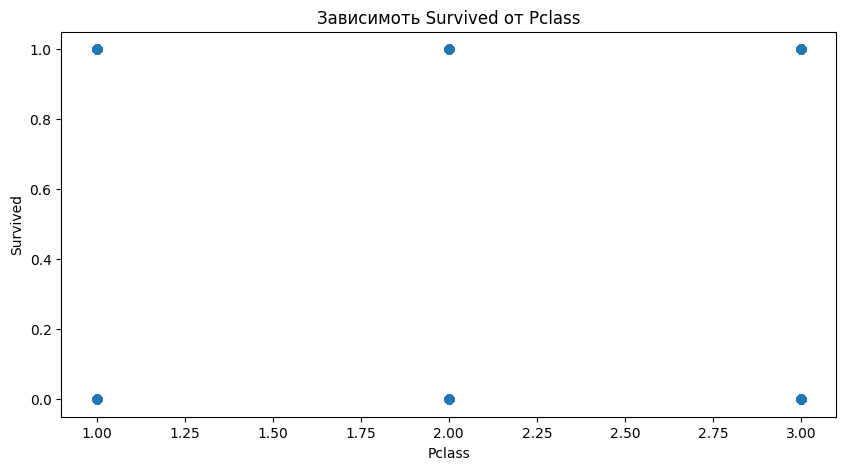

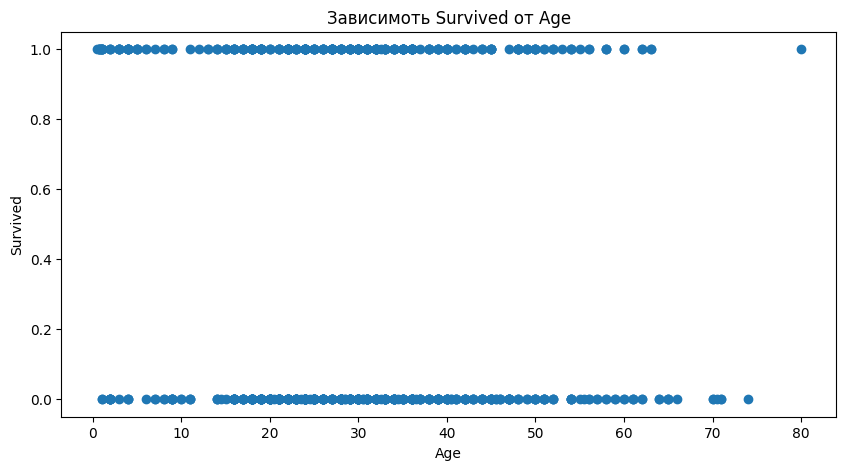

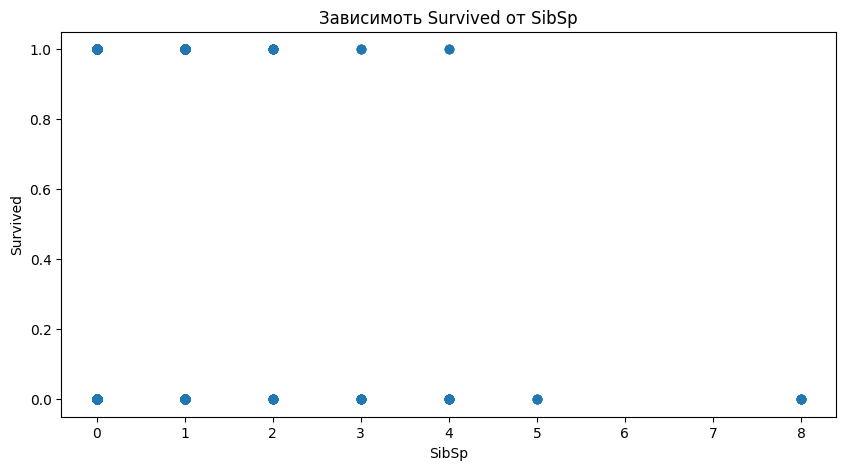

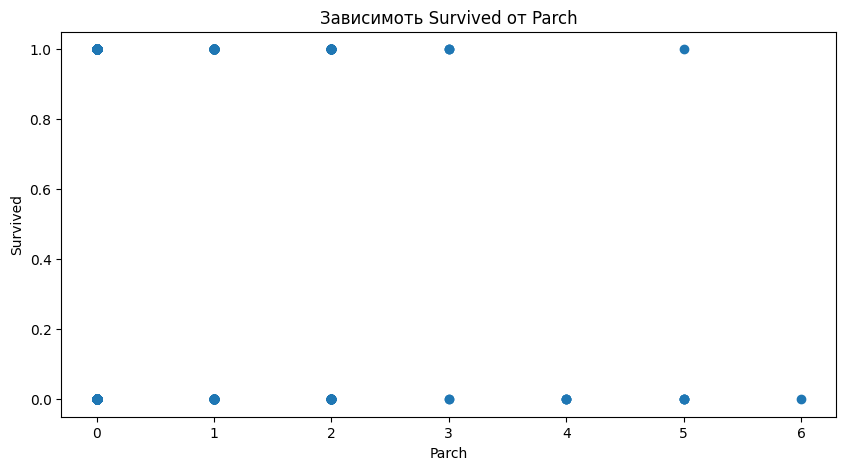

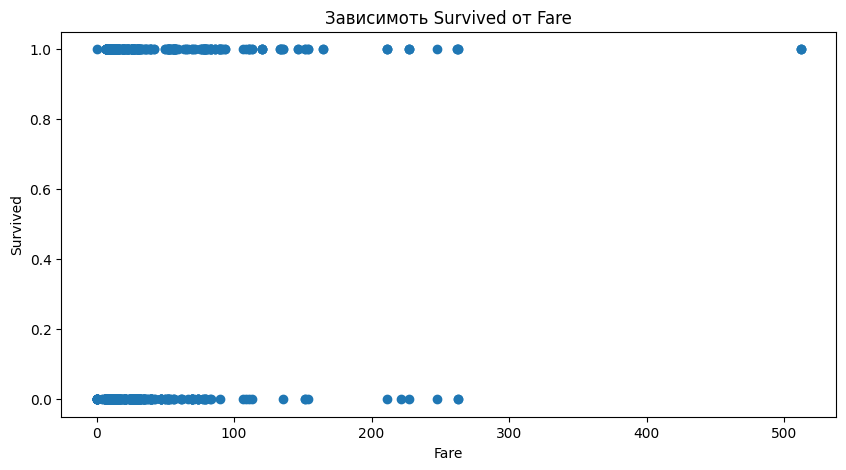

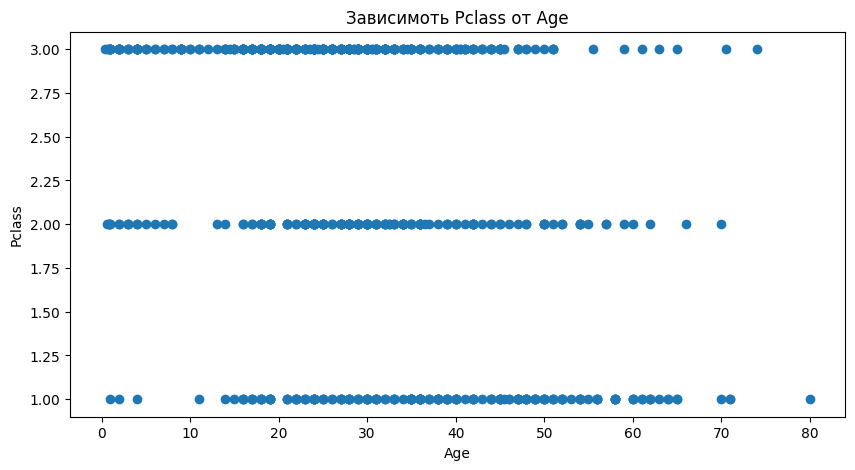

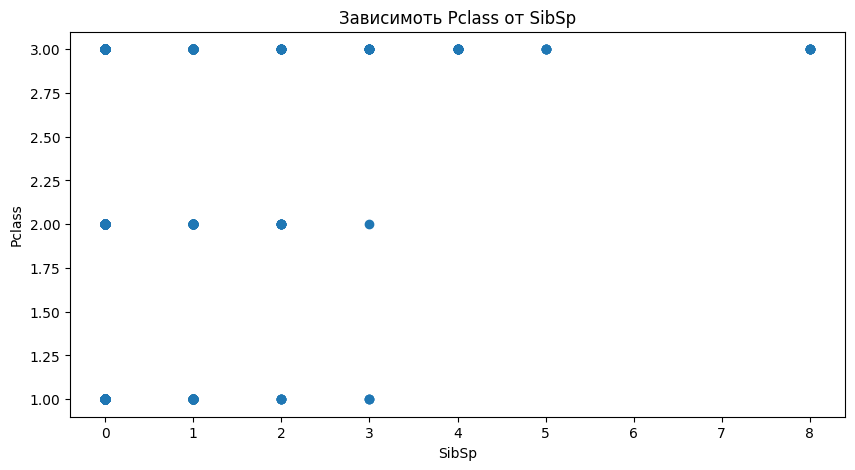

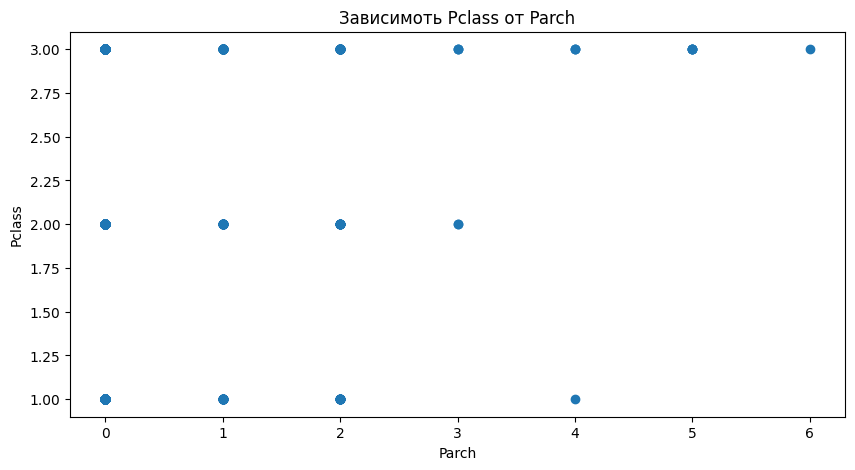

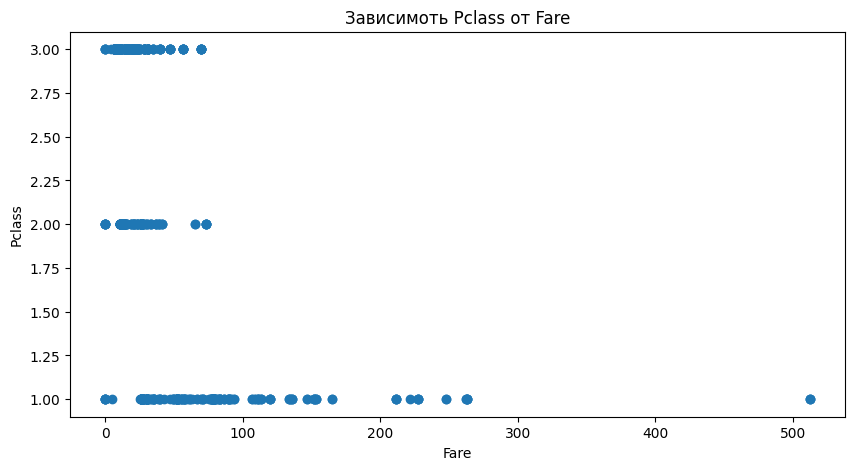

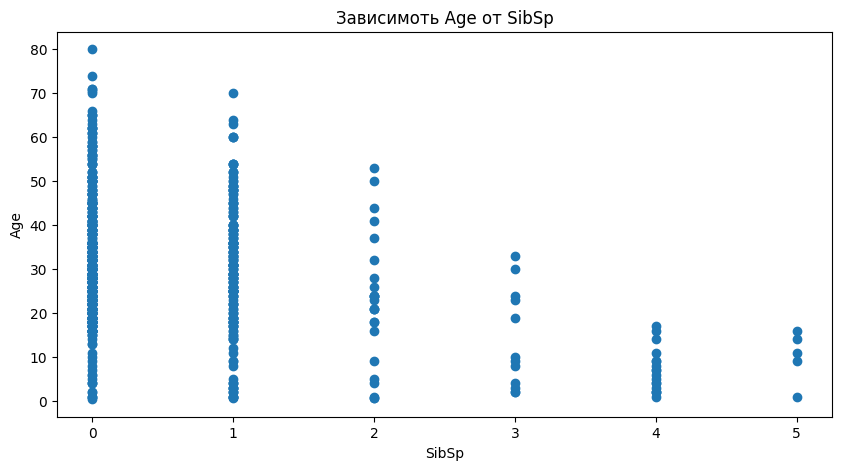

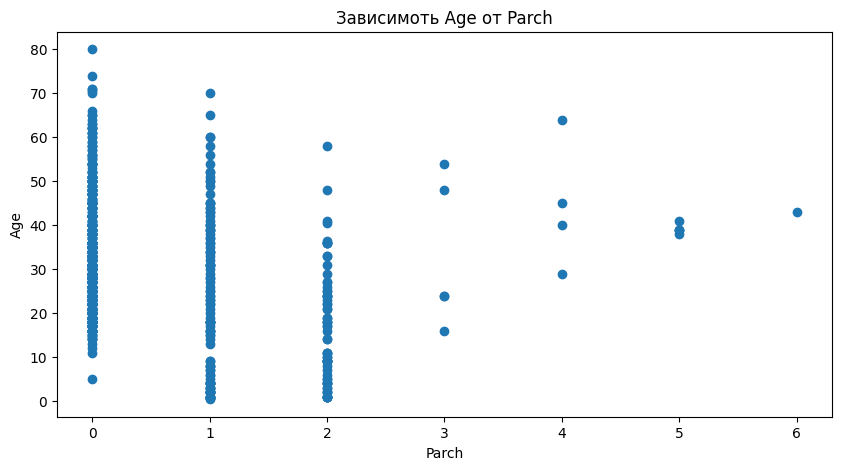

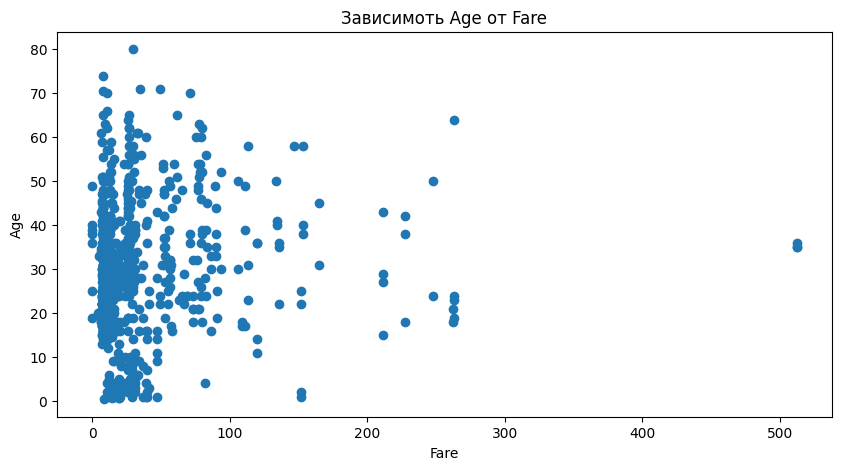

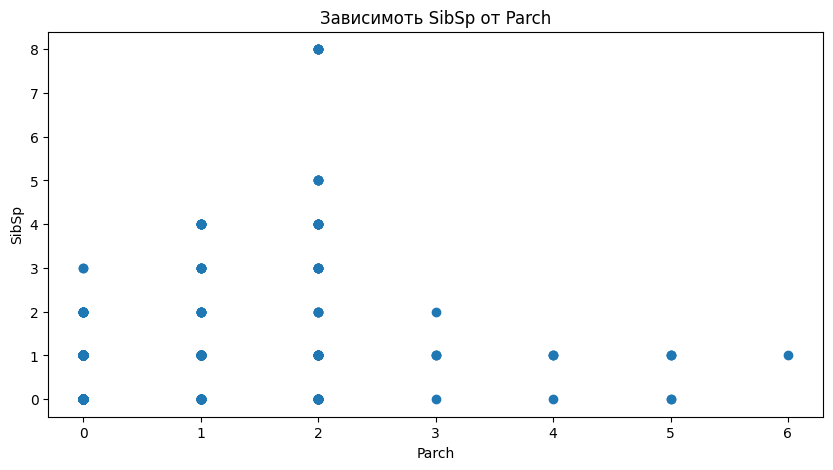

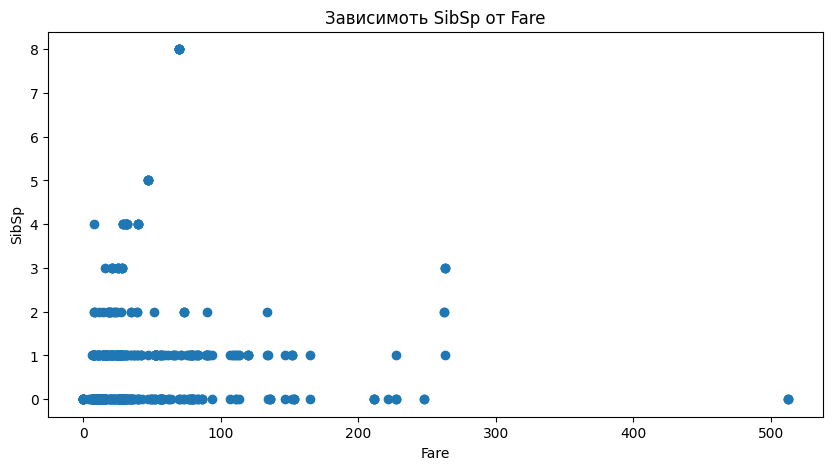

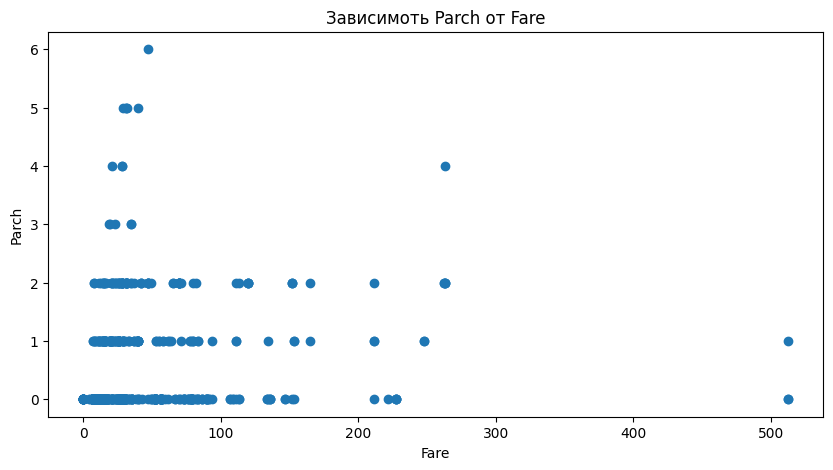

In [43]:
#Коэффициенты корреляции
s = ['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in range(0, len(s)-1):
    num1 = s[i]
    print('-----')
    print('Коэф. корреляции с ' + num1)
    print('-----')
    for j in range(i, len(s)):
        if i!=j:
            num2 = s[j]
            res = round(_data[num1].corr(_data[num2]), 1)
            print(num2 + ' ' + str(res))

#Диаграммы рассеивания
for i in range(0, len(s)-1):
    num1 = s[i]
    for j in range(i, len(s)):
        if i!=j:
            num2 = s[j]
            plt.figure(figsize=(10,5))
            plt.scatter(_data[num2], _data[num1])
            plt.xlabel(num2)
            plt.ylabel(num1)
            plt.title('Зависимоть '+num1 +' от '+ num2)



In [ ]:
'''
По вычесленным данным, можно заключить следующее (по шкале Чеддока):
--Нет атрибутов с высокой корреляцией
--Корреляция отсуствует между атрибутами:
Survived SibSp
Pclass Parch
--Очень слабая корреляция между атрибумами:
Survived Age
Survived Parch
Survived Fare
Pclass SibSp
Age Parch
Age Fare
SibSp Fare
Parch Fare
--Слабая:
Survived Pclass
Survived Fare
Pclass Age
Age SibSp
SibSp Parch
--Средняя:
Pclass Fare

Отрицательная корреляция у следующих атрибутов:
Survived Pclass
Survived Age
Pclass Age
Pclass Fare
Age SibSp
Age Parch

Положительная корреляция у следующих атрибутов:
Survived Parch
Survived Fare
Pclass SibSp
Age Fare
SibSp Parch
SibSp Fare
Parch Fare

Вывод: средняя зависимость выявленна между показателем 
социально-экономического статуса и пасажирским тарифом.
Остальные атрибуты либо слабо связанны между собой, либо не имеют никакой зависимости.
Так же возможен выброс в атрибуте "Fare" (наблюдается тариф со значением 500, 
что значительно отличается от остальных данных)
'''